In [2]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
ing=pd.read_csv('/Users/osman/Desktop/22-23 ualbany/ML/project/after mid/ingredients_v4.csv')  

In [4]:
# aggreagate ingredients and put them into list for each recipe
# new df --> recipeName | ingredientList
df=pd.read_csv('/Users/osman/Desktop/22-23 ualbany/ML/project/after mid/recipes_v4.csv')  
df=df.drop(columns=['Unnamed: 0', 'Unnamed: 1'])
df2=df.groupby('Recipe')['Ingredient'].agg(list).reset_index(name='ingredient')
df2.columns = ['recipe', 'ingredient']
df2

,recipe,ingredient
0,1-2-3-cherry-poke-cake,"[cake, water, whipped top, gelatin, chocol]"
1,1-2-3-complete-breakfast-smoothie,"[oat, water, honey, blueberri, protein powd, y..."
2,1-2-3-jambalaya,"[worcestershire sauc, olive oil, parsley, toma..."
3,1-dish-chicken-parmesan,"[chees, olive oil, spice, chicken, all purpose..."
4,1-dish-pepperoni-cheese-pizza-bake,"[all purpose flour, cooking spray, mozzarella ..."
...,...,...
66277,zweiback-cheesecake,"[egg, white sugar, margarin, cinnamon, cottage..."
66278,zwetschekuchen-german-plum-tart,"[cinnamon, lemon peel, butter, egg, white suga..."
66279,zwetschgendatschi-german-plum-sheet-cake,"[white sugar, vanilla sugar, all purpose flour..."
66280,zwieback,"[dry yeast, honey, all purpose flour, butter, ..."


In [5]:
# get the recipe health scores from another csv file then merge with our df
# new df --> recipeName | ingredientList | USDAScore | FSAScore
df3=pd.read_csv('/Users/osman/Desktop/22-23 ualbany/ML/project/after mid/recipes-scores.csv')  
df4=df2.merge(df3,how="left",on='recipe')
df4.drop_duplicates(subset="recipe",
                     keep=False, inplace=True)
df4

,recipe,ingredient,USDAscore,FSAscore
0,1-2-3-cherry-poke-cake,"[cake, water, whipped top, gelatin, chocol]",2,4
1,1-2-3-complete-breakfast-smoothie,"[oat, water, honey, blueberri, protein powd, y...",3,5
2,1-2-3-jambalaya,"[worcestershire sauc, olive oil, parsley, toma...",4,3
3,1-dish-chicken-parmesan,"[chees, olive oil, spice, chicken, all purpose...",4,3
4,1-dish-pepperoni-cheese-pizza-bake,"[all purpose flour, cooking spray, mozzarella ...",4,4
...,...,...,...,...
66626,zweiback-cheesecake,"[egg, white sugar, margarin, cinnamon, cottage...",2,2
66627,zwetschekuchen-german-plum-tart,"[cinnamon, lemon peel, butter, egg, white suga...",1,2
66628,zwetschgendatschi-german-plum-sheet-cake,"[white sugar, vanilla sugar, all purpose flour...",1,3
66629,zwieback,"[dry yeast, honey, all purpose flour, butter, ...",5,8


In [6]:
#creating a matrix recipes x ingredients (66107 recipes, 962 ingredietnts)
#It means 1 x 963 vector for each recipe
mat=np.zeros((66107,963))

ingp=ing['Ingredient'].to_numpy()
data=df2.to_numpy()

# searching ingredients in recipes. 
#In our matrix, if a recipe contains a word, corresponding index of the ingredient will be 1 for that recipe.
for i in range(962):
    for w in range(66106):
        if ingp[i] in data[w][1]:
            mat[w][i]=1


In [7]:
mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
#Converting our classes into numpy arrays
clss1=df4['FSAscore'].to_numpy()
clss2=df4['USDAscore'].to_numpy()


In [11]:
clss1.size

66107

In [12]:

def dist(data):
    zeros=0
    ones=0
    twos=0
    threes=0
    fours=0
    fives=0
    sixes=0
    sevens=0
    eights=0
    nines=0

    for i in range(66107):
        if data[i]==0:
            zeros +=1
        elif data[i]==1:
            ones +=1
        elif data[i]==2:
            twos +=1
        elif data[i]==3:
            threes +=1
        elif data[i]==4:
            fours +=1
        elif data[i]==5:
            fives +=1
        elif data[i]==6:
            sixes +=1
        elif data[i]==7:
            sevens +=1
        elif data[i]==8:
            eights +=1
        elif data[i]==9:
            nines +=1

    print("Distribution of Scores","\n","number of zero:",zeros,"\n","number of one:",ones,"\n","number of two:",twos,"\n","number of three:",threes,"\n","number of four:",fours,"\n","number of five:",fives,"\n","number of six:",sixes,"\n","number of seven:",sevens,"\n","number of eight:",eights,"\n","number of nine:",nines)
    print(zeros+ones+twos+threes+fours+fives+sixes+sevens+eights+nines)


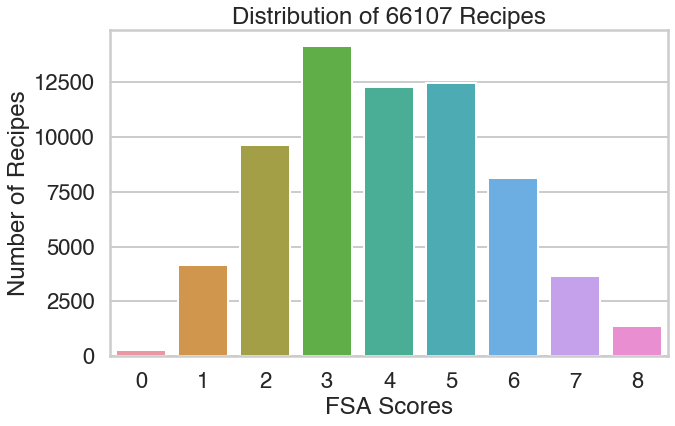

In [13]:
#distribution of scores (FSA)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='poster', palette='Set2')

plt.rc('font', family='serif',serif='Helvetica')

#font size  
plt.rcParams.update({'font.size': 1}) 



plt.figure(figsize=(10, 6))
sns.countplot(x='FSAscore', data=df4)
plt.title('Distribution of 66107 Recipes')
plt.xlabel('FSA Scores')
plt.ylabel('Number of Recipes')
plt.show()


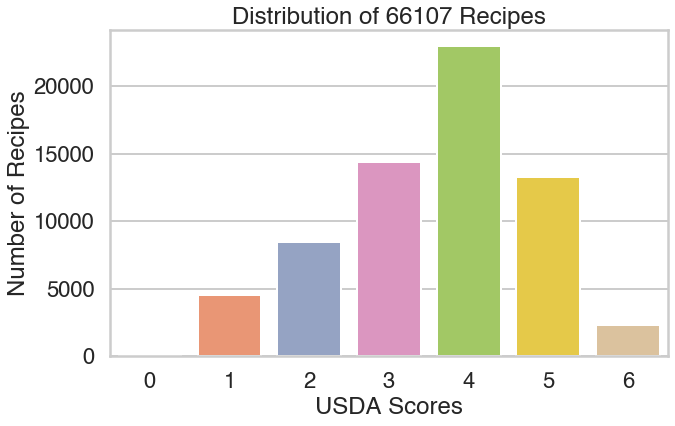

In [14]:
#distribution of scores (USDA)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='poster', palette='Set2')

plt.rc('font', family='serif',serif='Helvetica')

#font size  
plt.rcParams.update({'font.size': 1}) 



plt.figure(figsize=(10, 6))
sns.countplot(x='USDAscore', data=df4)
plt.title('Distribution of 66107 Recipes')
plt.xlabel('USDA Scores')
plt.ylabel('Number of Recipes')
plt.show()


In [15]:
print(dist(clss1),"USDA",'\n',dist(clss2))

Distribution of Scores 
 number of zero: 292 
 number of one: 4169 
 number of two: 9625 
 number of three: 14146 
 number of four: 12265 
 number of five: 12441 
 number of six: 8099 
 number of seven: 3674 
 number of eight: 1396 
 number of nine: 0
66107
Distribution of Scores 
 number of zero: 1 
 number of one: 4543 
 number of two: 8501 
 number of three: 14431 
 number of four: 23019 
 number of five: 13274 
 number of six: 2338 
 number of seven: 0 
 number of eight: 0 
 number of nine: 0
66107
None USDA 
 None


In [16]:
print(mat.shape,clss1.shape,clss2.shape)

(66107, 963) (66107,) (66107,)


In [86]:
#I'll try to convert our data to CSR dense matrix and feed it to ML methods
from scipy.sparse import csr_matrix
matcsr=csr_matrix(mat)

In [93]:
#Converted CSR matrix will be fed to ML methods for clss1 which is FSA Binary Labeling
#same methods are also applied for clss1 which is FSA Binary Labeling
xtraincsr,xtestcsr,ytraincsr,ytestcsr=train_test_split(matcsr,clss2,test_size=0.3, random_state=21)

def modelfitcsr(mod):
    model=mod
    model.fit(xtraincsr,ytraincsr)
    ypredcsr=model.predict(xtestcsr)
    print(accuracy_score(ytestcsr,ypredcsr))


In [94]:
print("Logistic Reg ACC: ", modelfitcsr(LogisticRegression(max_iter=1000)), '\n',
 "Random Forest ACC", modelfitcsr(RandomForestClassifier(n_estimators=100)), '\n',
"Gradient Boosting ACC:", modelfitcsr(GradientBoostingClassifier(n_estimators=100)), '\n',
"Decision Tree ACC:", modelfitcsr(tree.DecisionTreeClassifier()), '\n',
"Neural Network ACC:", modelfitcsr(MLPClassifier(alpha=1e-5,hidden_layer_sizes=(1, 16),max_iter=1000)))
     

0.33025765138909896
0.31180355972369284
0.3447789038471235
0.24020571774315536
0.3355518580144204
Logistic Reg ACC:  None 
 Random Forest ACC None 
 Gradient Boosting ACC: None 
 Decision Tree ACC: None 
 Neural Network ACC: None
